In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("/content/tunnel.csv", parse_dates=['Day'])
df = df.set_index('Day')
df = df.to_period()

df.head()

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


In [ ]:
# Set Matplotlib defaults #
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(20, 7))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

# Linearly Model

In [ ]:
df_copy = df.copy()
df_copy['Time'] = np.arange(len(df.index))
df_copy.head()

,NumVehicles,Time
Day,,
2003-11-01,103536,0
2003-11-02,92051,1
2003-11-03,100795,2
2003-11-04,102352,3
2003-11-05,106569,4


In [ ]:
from sklearn.linear_model import LinearRegression

X = df_copy.loc[: ,['Time']]
y = df_copy.loc[: , 'NumVehicles']

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

print(f'Number of Vehicles = {model.coef_[0]:.2f} * t + {model.intercept_:.2f}')

Number of Vehicles = 22.50 * t + 98176.21


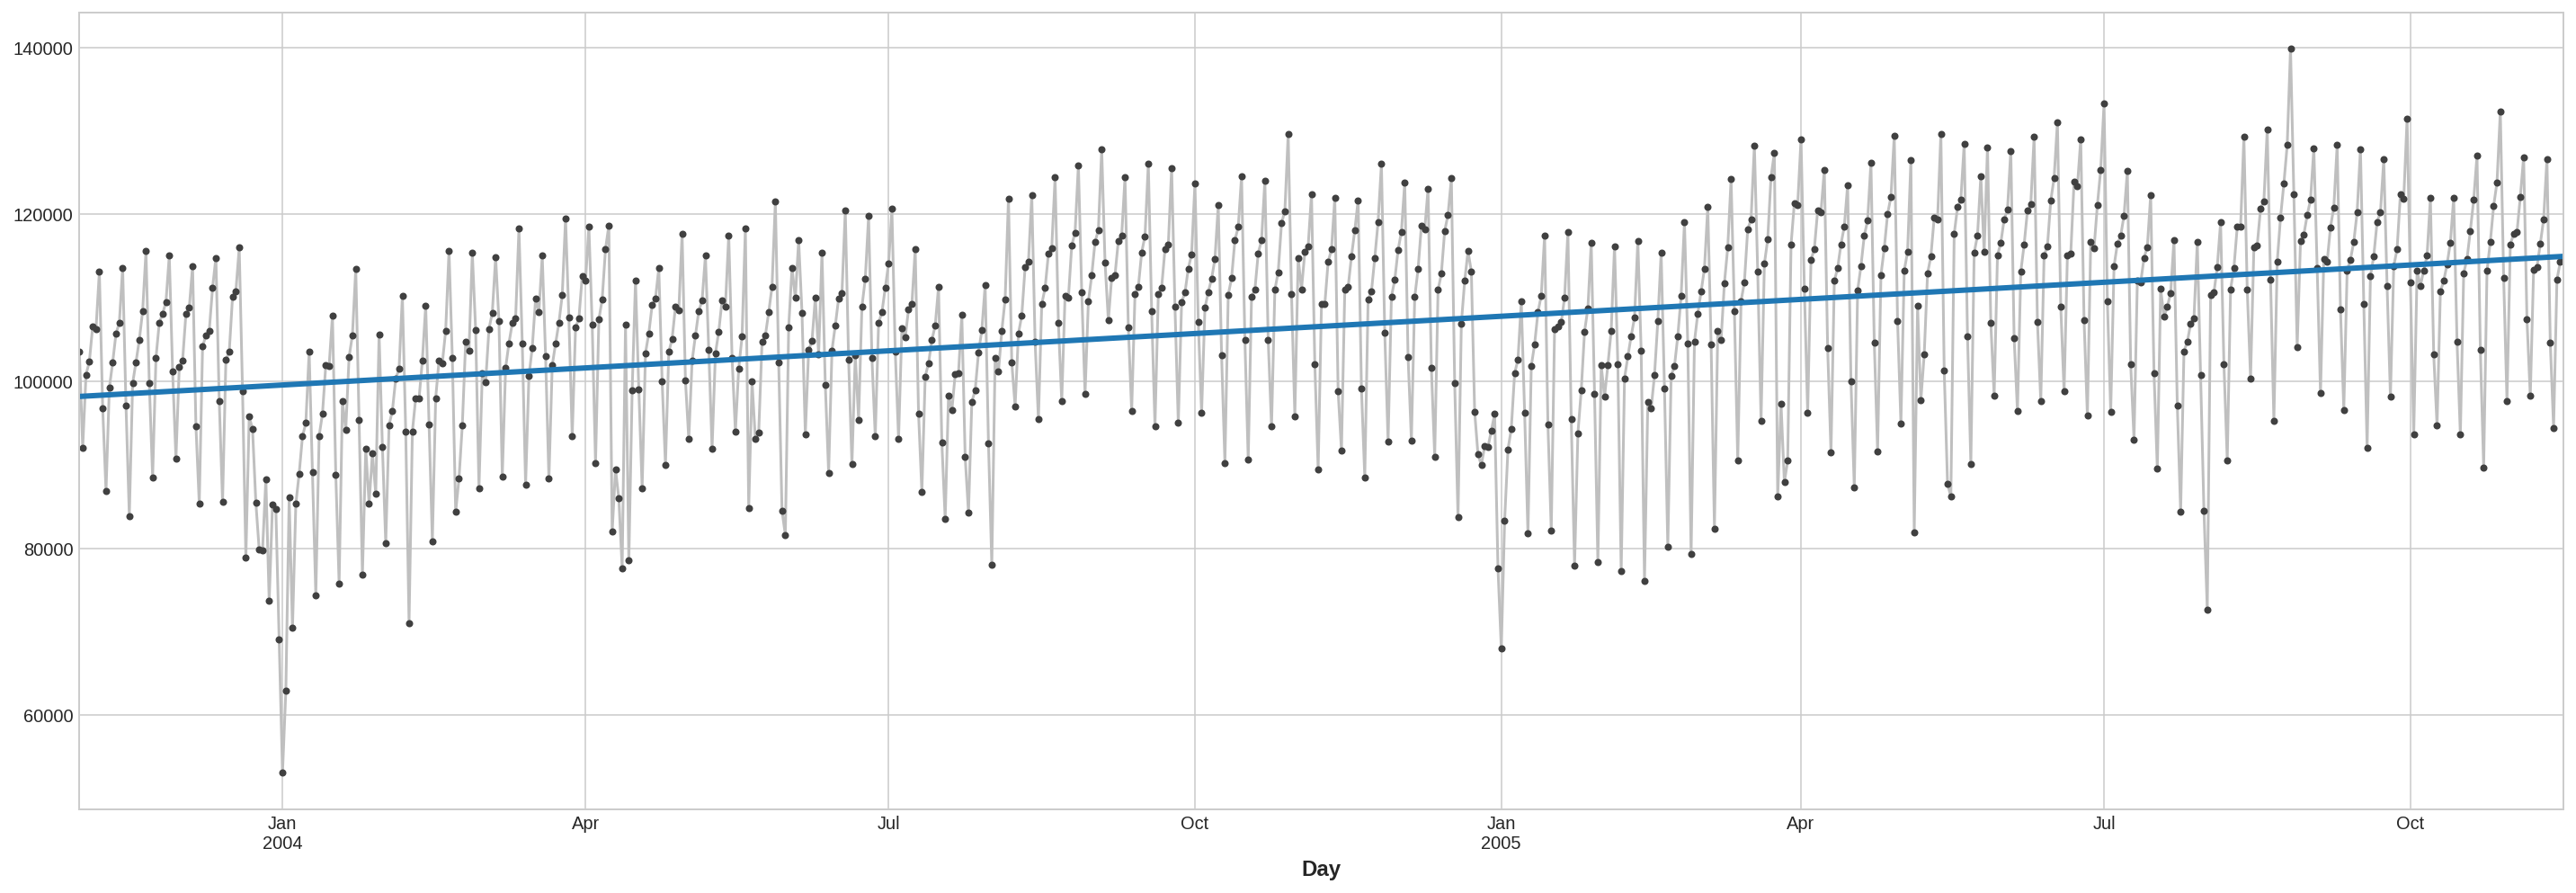

In [ ]:
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)

# Lag Feature

In [ ]:
df_copy['Lag'] = df_copy['NumVehicles'].shift()
df_copy.head()

,NumVehicles,Time,Lag
Day,,,
2003-11-01,103536,0,NaN
2003-11-02,92051,1,103536.0
2003-11-03,100795,2,92051.0
2003-11-04,102352,3,100795.0
2003-11-05,106569,4,102352.0


In [ ]:
X = df_copy.loc[:, ['Lag']]
X.dropna(inplace=True)
y = df_copy.loc[:, 'NumVehicles']

y, X = y.align(X, join='inner')

model.fit(X, y)
y_pred = pd.Series(model.predict(X), index=X.index)
print(f'Number of Vehicles = {model.coef_[0]:.2f} * t + {model.intercept_:.2f}')

Number of Vehicles = 0.53 * t + 49780.62


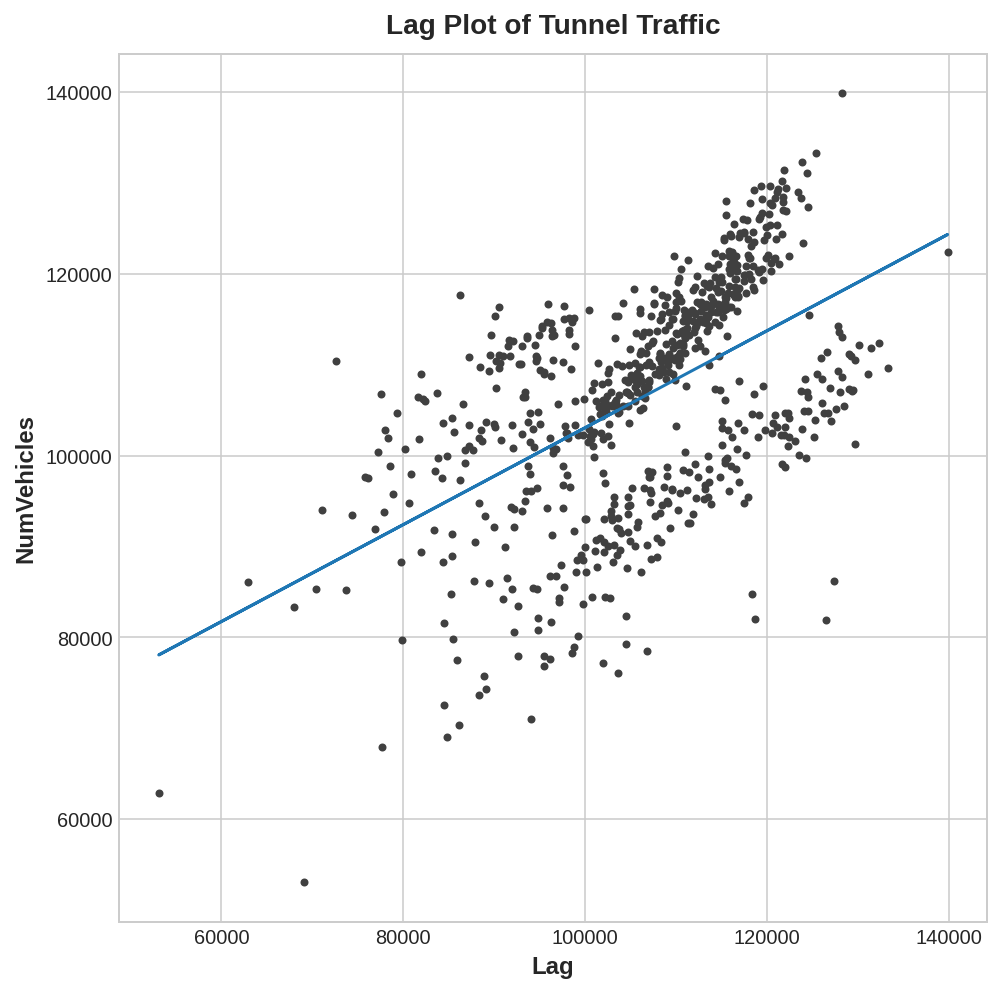

In [ ]:
fig, ax = plt.subplots()
ax.plot(X['Lag'], y, '.', color='0.25')
ax.plot(X['Lag'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('NumVehicles')
ax.set_xlabel('Lag')
ax.set_title('Lag Plot of Tunnel Traffic');

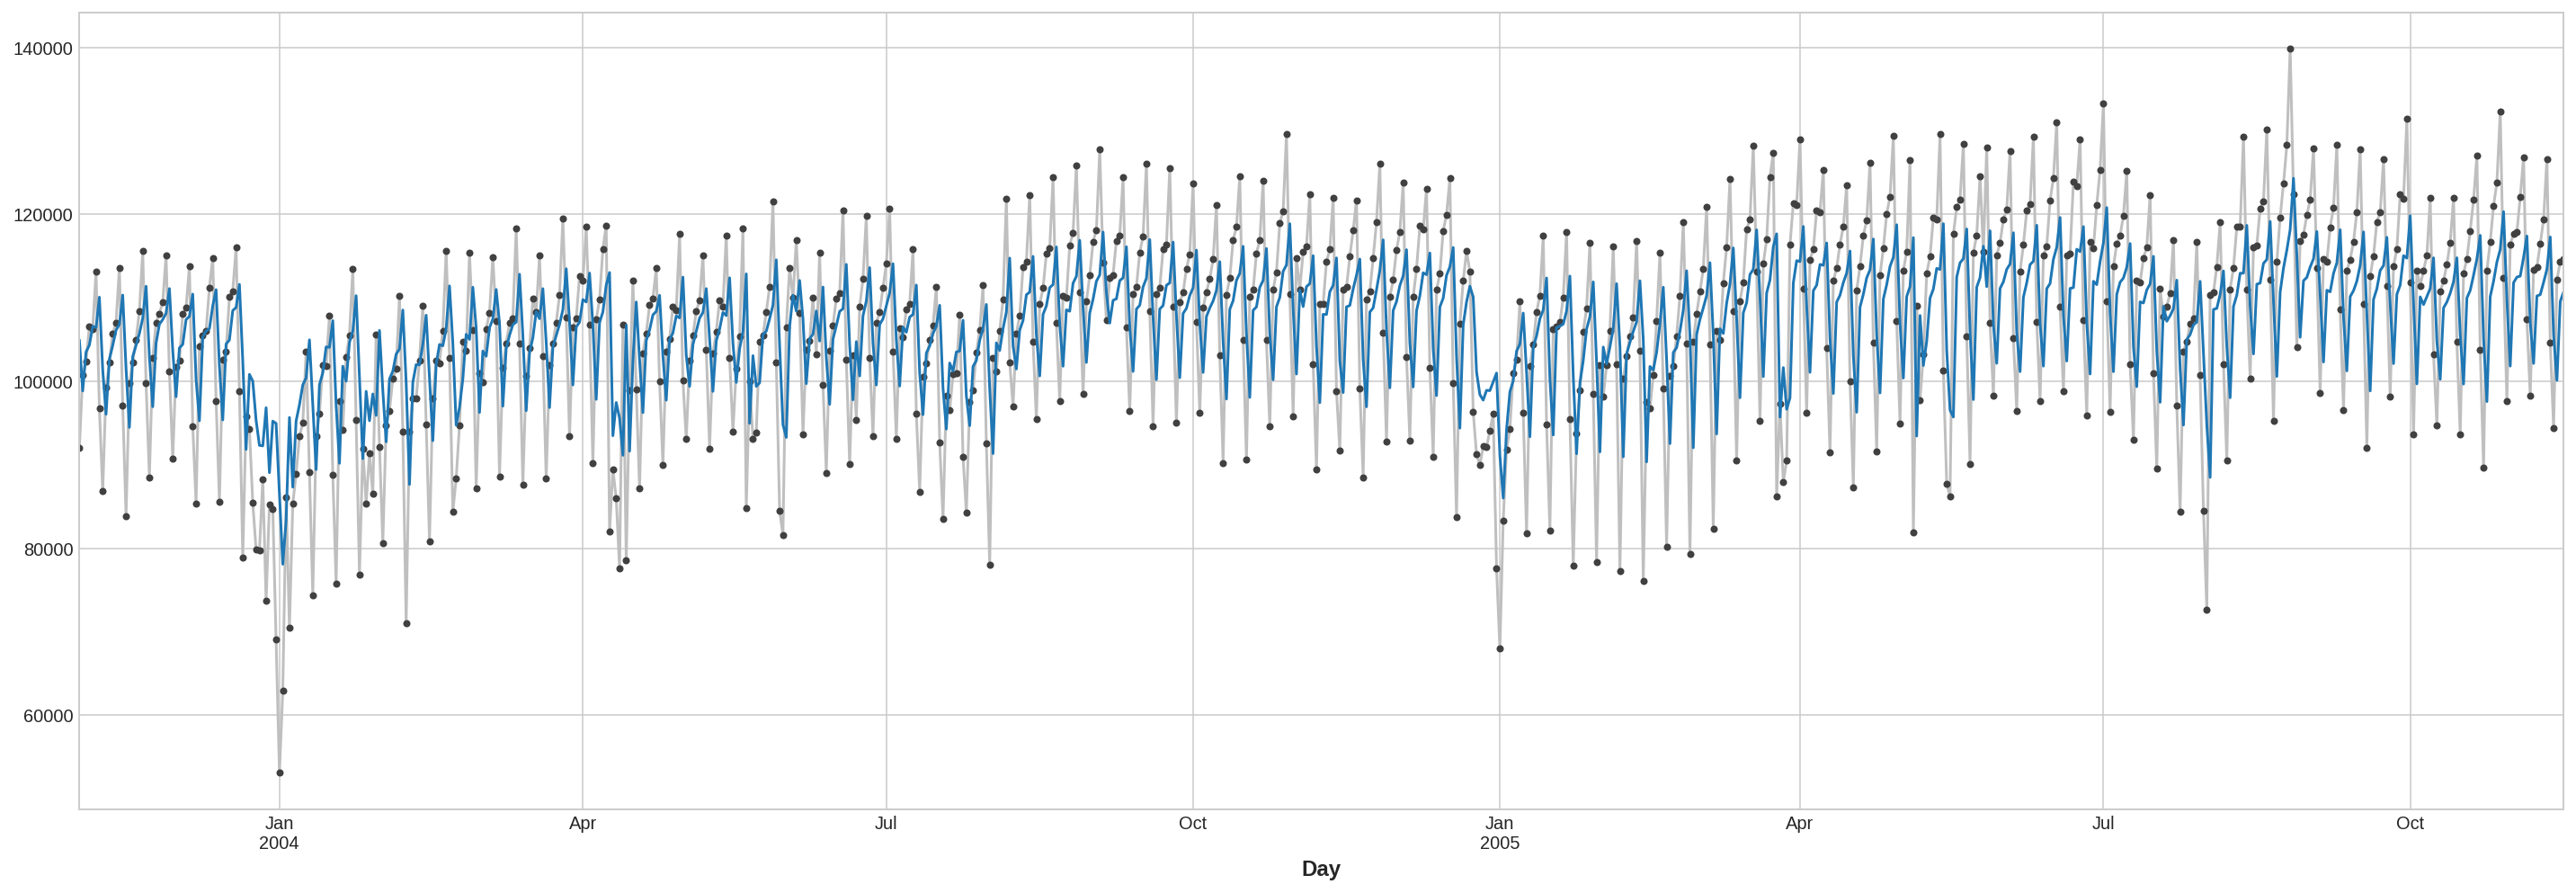

In [ ]:
ax = y.plot(**plot_params)
ax = y_pred.plot()

# Engineering Trends

<AxesSubplot:xlabel='Day'>

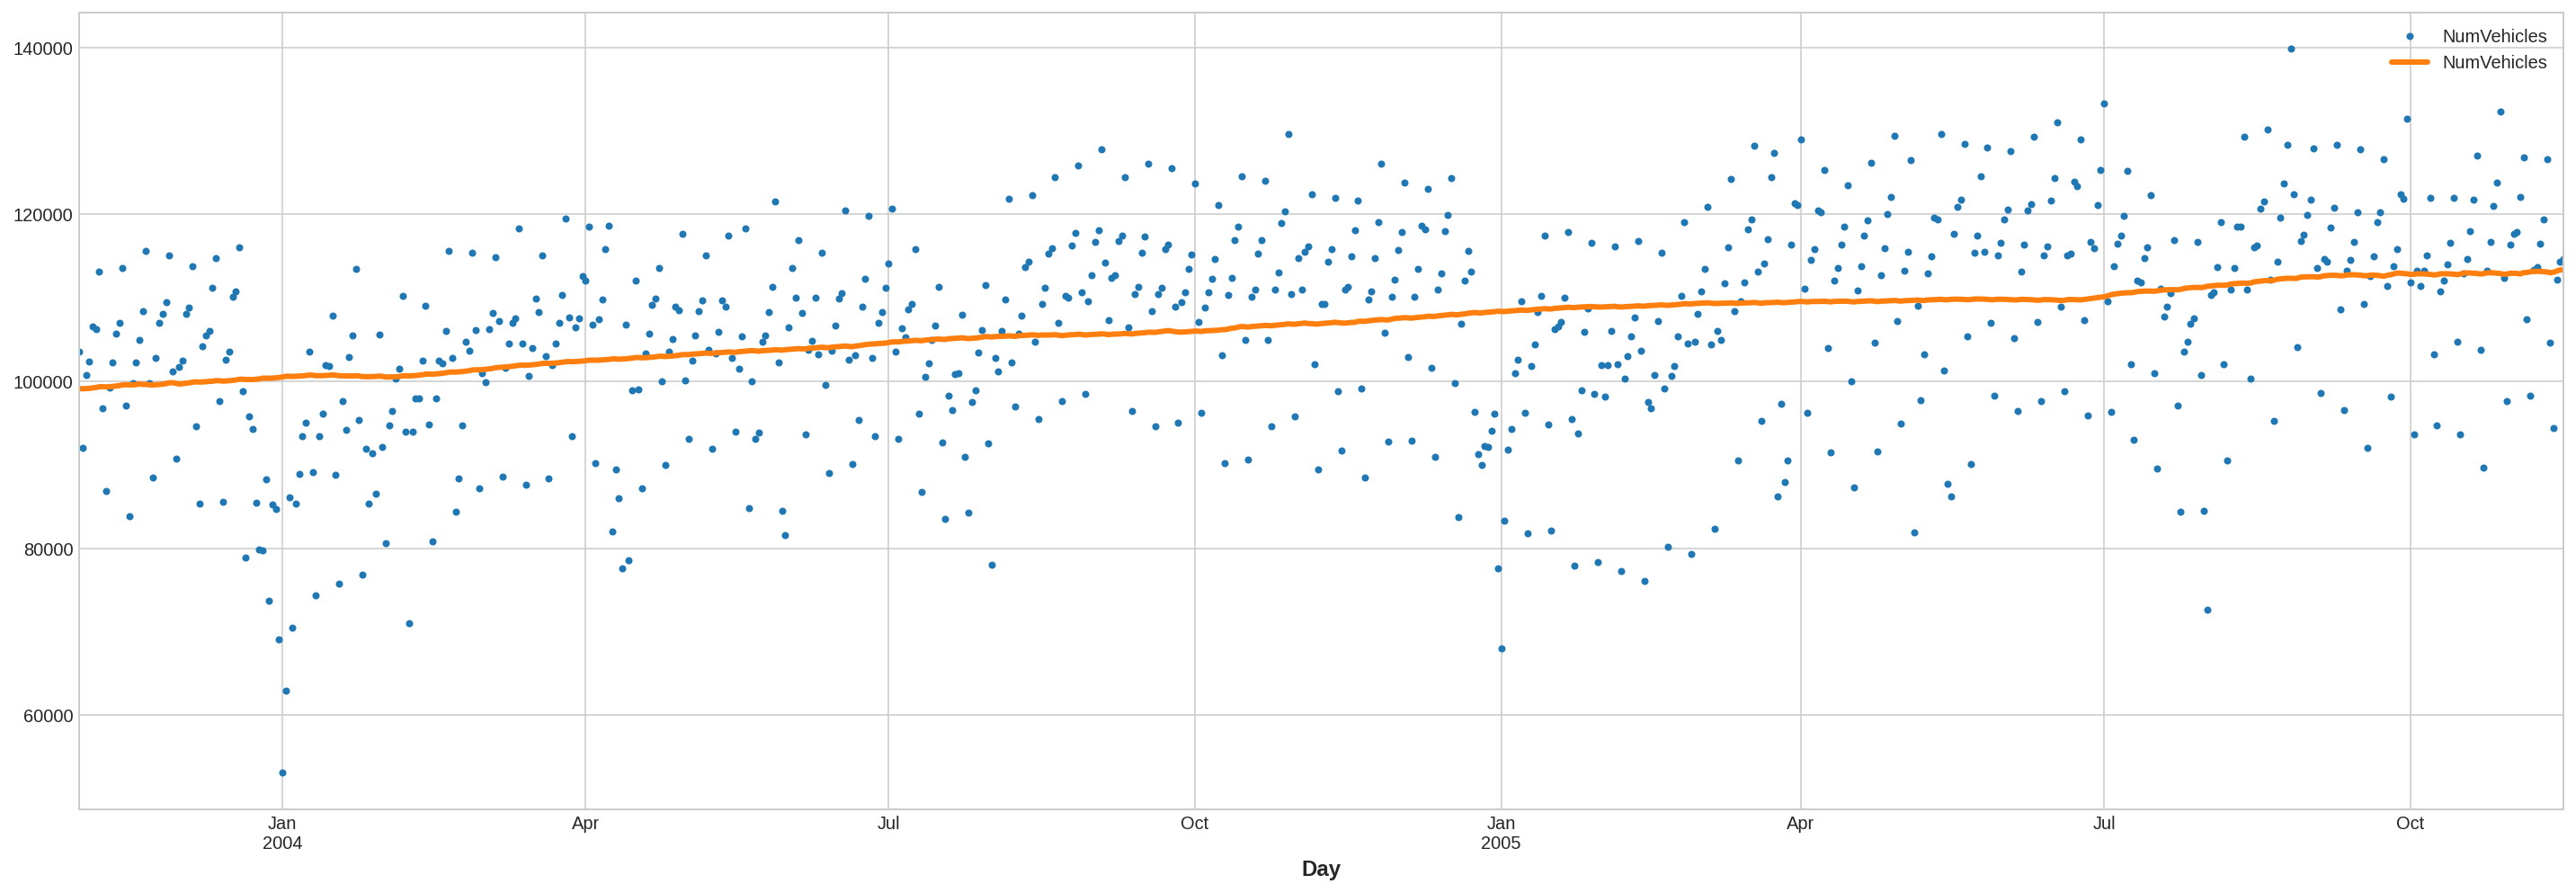

In [ ]:
moving_mean = df.rolling(window=365, center=True, min_periods=183).mean()
ax = df.plot(style=".")
moving_mean.plot(ax=ax, linewidth=3)

In [ ]:
from statsmodels.tsa.deterministic import DeterministicProcess

dp = DeterministicProcess(index=df.index, constant=True, order=1, drop=True)
X = dp.in_sample()

X.head()

,const,trend
Day,,
2003-11-01,1.0,1.0
2003-11-02,1.0,2.0
2003-11-03,1.0,3.0
2003-11-04,1.0,4.0
2003-11-05,1.0,5.0


# Train Model Again

In [ ]:
y = df['NumVehicles']
model =  LinearRegression(fit_intercept=False)
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

<AxesSubplot:xlabel='Day'>

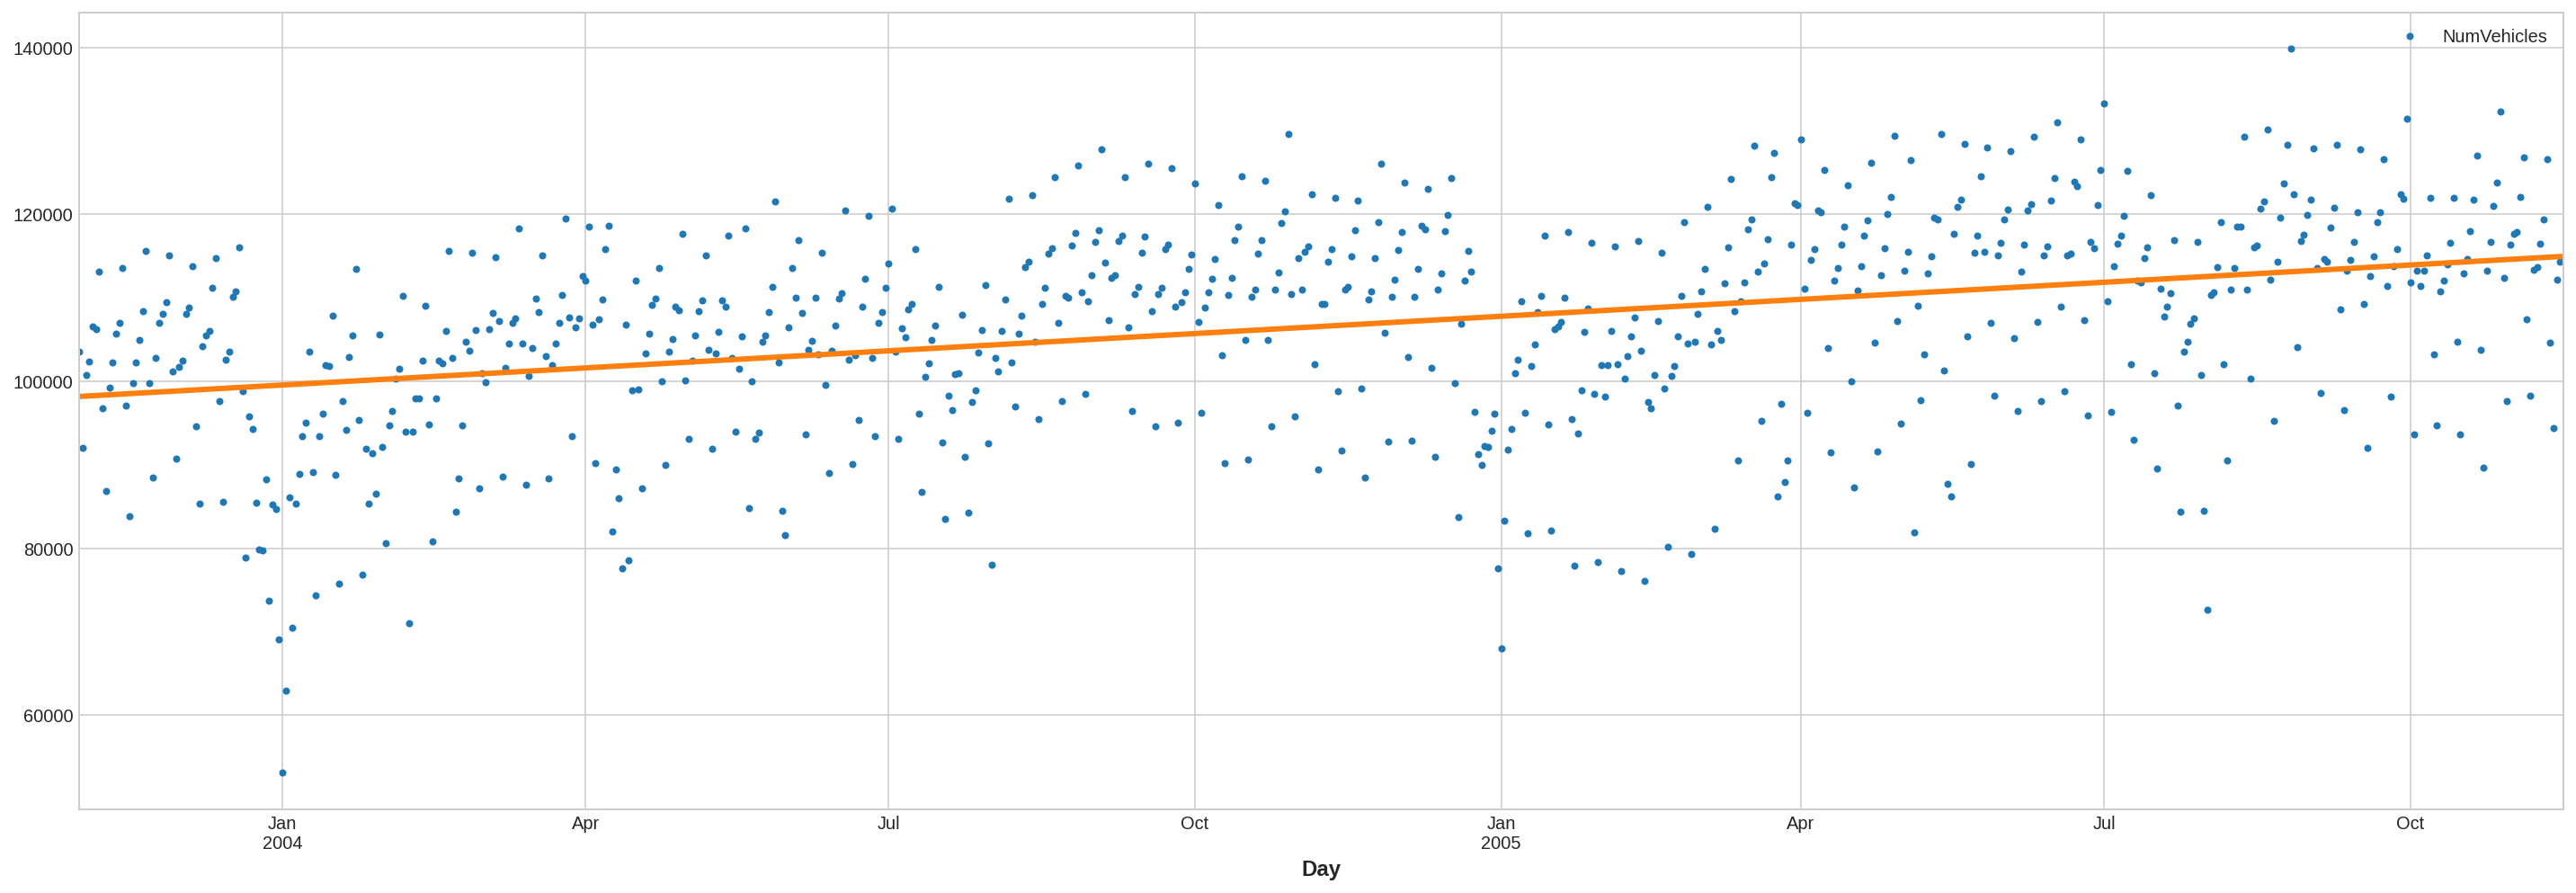

In [ ]:
ax = df.plot(style='.')
y_pred.plot(ax=ax, linewidth=3, label="Trend")

In [ ]:
X = dp.out_of_sample(steps=30)
y_fore = pd.Series(model.predict(X), index=X.index)
y_fore.head()

2005-11-17    114981.801146
2005-11-18    115004.298595
2005-11-19    115026.796045
2005-11-20    115049.293494
2005-11-21    115071.790944
Freq: D, dtype: float64

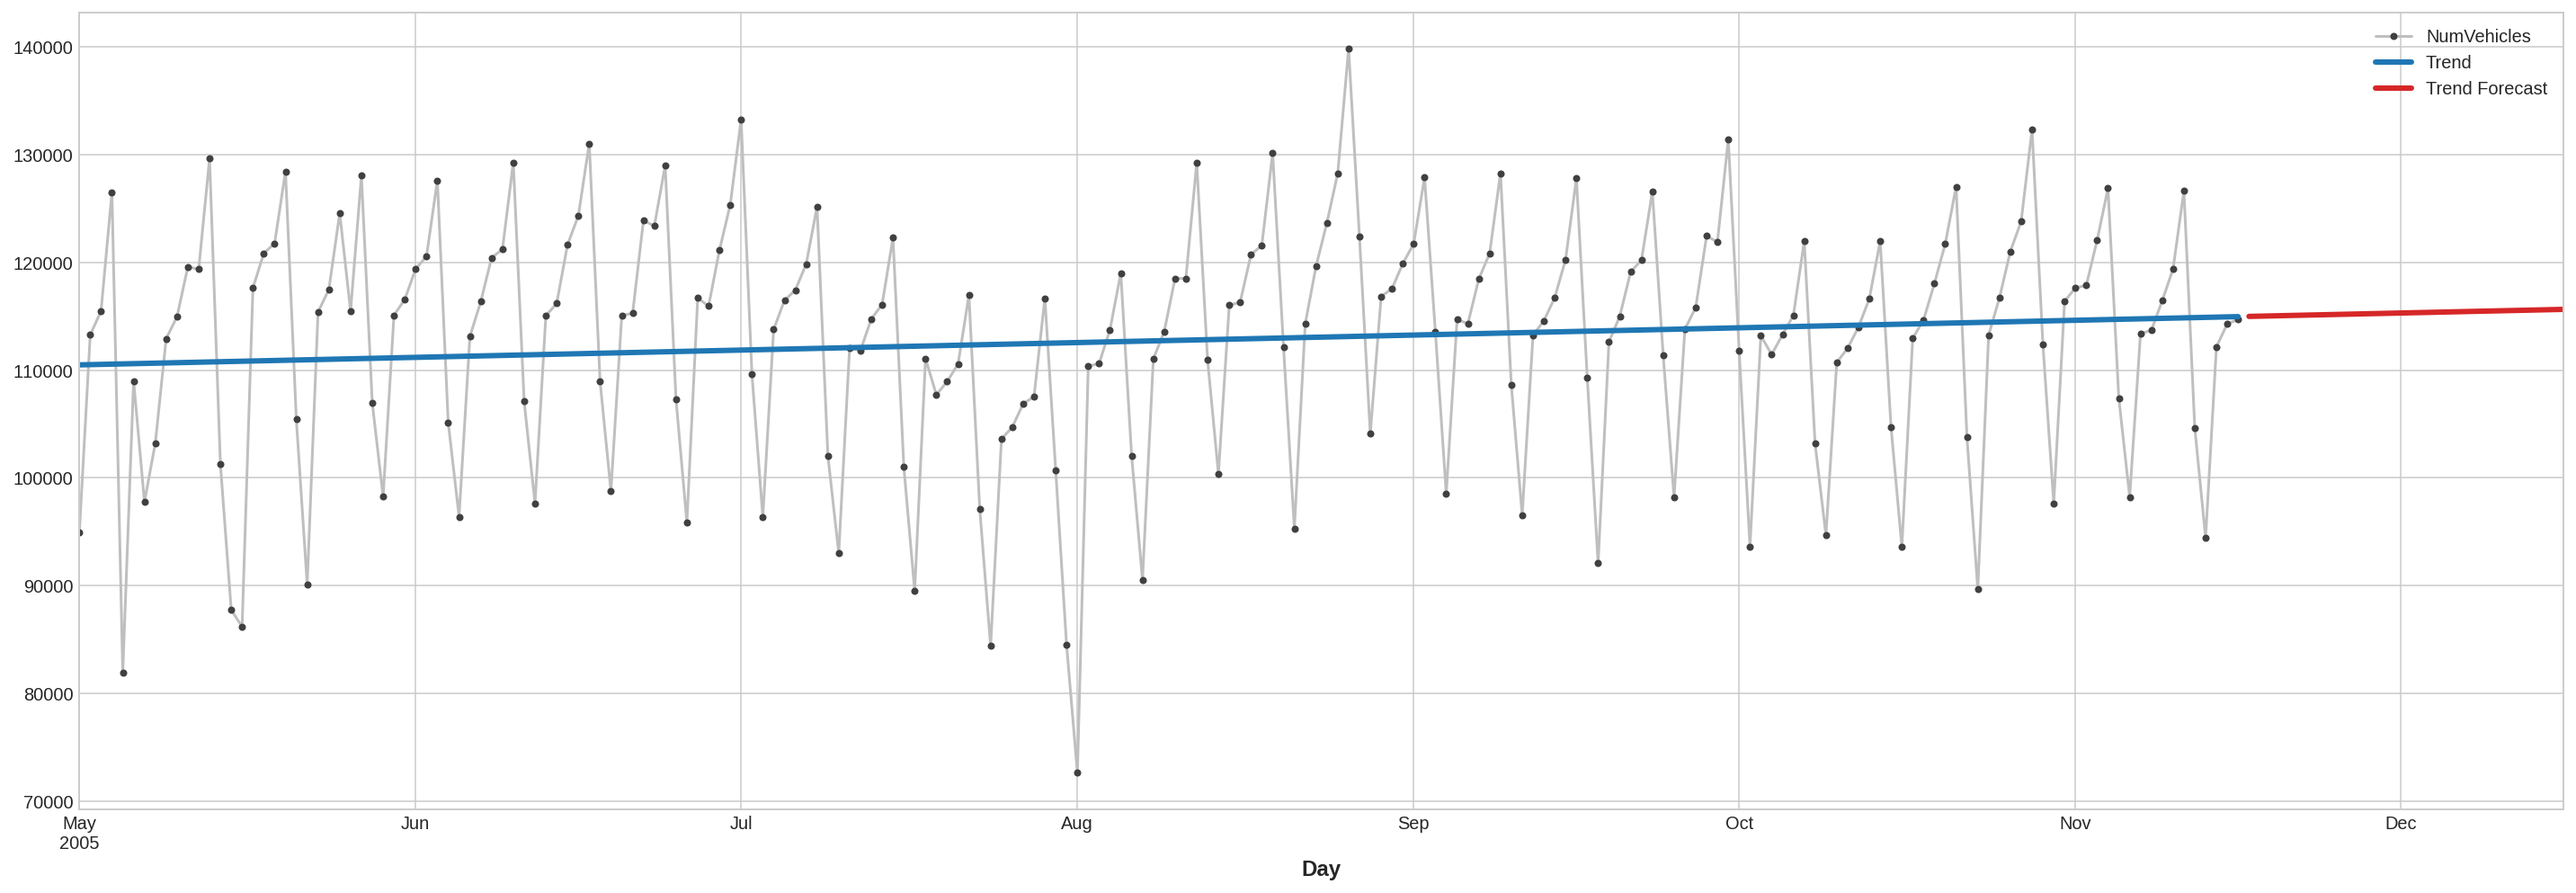

In [ ]:
ax = df['2005-05':].plot(**plot_params)
ax = y_pred['2005-05':].plot(ax=ax, linewidth=3, label="Trend")
ax = y_fore.plot(ax=ax, linewidth=3, label="Trend Forecast", color='C3')
ax.legend()